<a href="https://colab.research.google.com/github/Kei-Kobayash/practice_machine_learning/blob/main/ml_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Import data

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa
3,0.08,0.46,0.26,0.04,Iris-setosa
4,0.19,0.67,0.44,0.04,Iris-setosa


# Japanese => English

In [6]:
ja_column = df.columns.to_list()
en_column = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "type"]

for ja, en in zip(ja_column, en_column):
  df.rename(columns = {ja:en}, inplace = True)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,type
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa
3,0.08,0.46,0.26,0.04,Iris-setosa
4,0.19,0.67,0.44,0.04,Iris-setosa


# Check data content


In [10]:
df["type"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df["type"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64

## check N/A

In [13]:
df.isnull().any(axis=0)

sepal_len     True
sepal_wid     True
petal_len     True
petal_wid     True
type         False
dtype: bool

In [15]:
tmp = df.isnull()
tmp.sum()

sepal_len    2
sepal_wid    1
petal_len    2
petal_wid    2
type         0
dtype: int64

In [16]:
df2 = df.dropna(how = "any", axis = 0)

In [17]:
df.mean()

<ipython-input-17-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


sepal_len    0.420878
sepal_wid    0.440403
petal_len    0.486757
petal_wid    0.447432
dtype: float64

In [24]:
colmean = df.mean()
df2 = df.fillna(colmean)
df2.isnull().any(axis=0)

<ipython-input-24-58763f0abaea>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  colmean = df.mean()


sepal_len    False
sepal_wid    False
petal_len    False
petal_wid    False
type         False
dtype: bool

# Model

In [35]:
features = df2.columns.to_list()[0:4]

x = df2[features]
t = df2["type"]

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)

#model fit
model.fit(x,t)

# evaluation
model.score(x,t)

0.94

## Split data into train and test. Holdout method

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

In [41]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [42]:
model.fit(x_train, t_train)
model.score(x_test, t_test)

0.9555555555555556

[Text(0.4, 0.8333333333333334, 'petal_wid <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'petal_wid <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

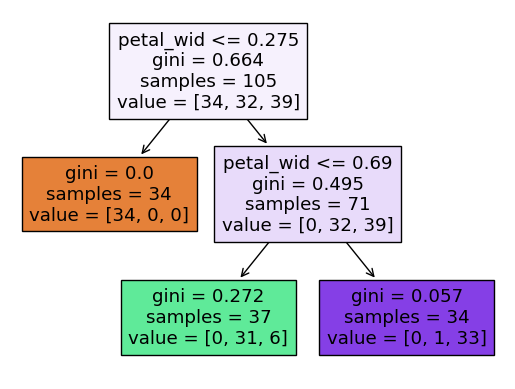

In [44]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names = features, filled = True)